In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter
import nibabel as nib

In [12]:
cases

['case_00001', 'case_00002', 'case_00004', 'case_00012', 'case_00063']

In [2]:
path = "./kits23/dataset"
cases = sorted([file for file in os.listdir(path) if file.startswith("case")])

In [3]:
for case in cases:
    seg = nib.load(f"{path}/{case}/segmentation.nii.gz")

['case_00001', 'case_00002', 'case_00004', 'case_00012', 'case_00063']

In [13]:
seg = nib.load(f"{path}/{cases[-1]}/segmentation.nii.gz").get_fdata()

In [23]:
prop_0 = []
prop_1 = []
prop_2 = []
prop_3 = []
for s in seg:
    value, counts = np.unique(s, return_counts=True)
    prop_0.append(np.sum(s == 0) / (512 ** 2))
    prop_1.append(np.sum(s == 1) / (512 ** 2))
    prop_2.append(np.sum(s == 2) / (512 ** 2))
    prop_3.append(np.sum(s == 3) / (512 ** 2))


In [28]:
1 / np.mean(prop_0), 1 / np.mean(prop_1), 1 / np.mean(prop_2), 1 / np.mean(prop_3)

(1.009616349568679, 110.118111434996, 4441.832936788631, 4577.379410887645)

In [22]:
res = [np.unique(s, return_counts=True)[1] / (512 ** 2) for s in seg]

[array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array

/var/folders/vd/kxpksy2d7y38p7dhcb1l1gdr0000gn/T/ipykernel_7780/568799353.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(counts)


array([[array([0.]), array([262144])],
       [array([0.]), array([262144])],
       [array([0.]), array([262144])],
       ...,
       [array([0.]), array([262144])],
       [array([0.]), array([262144])],
       [array([0.]), array([262144])]], dtype=object)

In [26]:
# List instances
instances = {}
for case in cases:
    instance_path = os.path.join(path, case, "instances")
    seg_size = os.path.getsize(os.path.join(path, case, "segmentation.nii.gz"))  / 1000000
    n_kidney = sum([1 if inst.startswith("kidney") and inst.endswith("annotation-1.nii.gz") else 0 for inst in os.listdir(instance_path)])
    n_tumor = sum([1 if inst.startswith("tumor") and inst.endswith("annotation-1.nii.gz") else 0 for inst in os.listdir(instance_path)])
    n_cyst = sum([1 if inst.startswith("cyst") and inst.endswith("annotation-1.nii.gz") else 0 for inst in os.listdir(instance_path)])
    n_annotations = max([inst[-8] for inst in os.listdir(instance_path)])
    data = {
        "seg_size": seg_size,
        "n_kidney": n_kidney,
        "n_tumor": n_tumor,
        "n_cyst": n_cyst,
        "n_annotations": n_annotations
    }
    instances[case] = data

In [31]:
metadata = pd.DataFrame(instances).transpose()

In [50]:
# Occurances
print(metadata["n_kidney"].value_counts())
print(metadata["n_tumor"].value_counts())
print(metadata["n_cyst"].value_counts())


2    476
1     12
3      1
Name: n_kidney, dtype: int64
1     437
2      39
3      10
0       1
4       1
10      1
Name: n_tumor, dtype: int64
0     241
1      82
2      62
3      28
5      17
4      15
6      13
8       7
9       7
7       6
10      3
13      2
11      1
14      1
15      1
17      1
20      1
27      1
Name: n_cyst, dtype: int64


max: 1.420778, min: 0.061404, avg: 0.29325350920245397


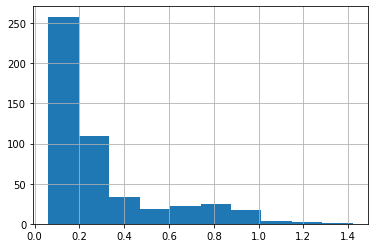

In [69]:
# segmentation size to get a general idea for memory management
metadata["seg_size"].hist()
print(f"max: {metadata['seg_size'].max()}, min: {metadata['seg_size'].min()}, avg: {metadata['seg_size'].mean()}")


In [74]:
# Check number of annotations
metadata["n_annotations"].value_counts()

3    300
1    186
2      3
Name: n_annotations, dtype: int64

In [82]:
metadata[metadata["n_annotations"] == "2"]

,seg_size,n_kidney,n_tumor,n_cyst,n_annotations
case_00440,0.084051,1,1,1,2
case_00491,0.10966,2,1,2,2
case_00515,0.508444,2,0,20,2


In [80]:
total_annotations = {}
for case in cases:
    instance_path = os.path.join(path, case, "instances")
    total_ann = [inst[-8] for inst in os.listdir(instance_path) if inst.startswith("cyst")]
    arr = np.array(total_ann)
    arr = Counter(total_ann).values()
    total_annotations[case] = arr
total_annotations

,seg_size,n_kidney,n_tumor,n_cyst,n_annotations
case_00000,0.776578,2,1,0,3
case_00001,0.851533,2,2,0,3
case_00002,0.373942,2,1,2,3
case_00003,0.379266,2,1,0,3
case_00004,0.101172,2,1,0,3
...,...,...,...,...,...
case_00584,0.161749,2,3,0,1
case_00585,0.269877,2,1,0,1
case_00586,0.263712,2,3,7,1
case_00587,0.086523,2,1,1,1


In [153]:
df = pd.DataFrame({"case": np.repeat("case_000", 200000), "slice": np.repeat(200, 200000)})

In [163]:
from pympler import asizeof

size = asizeof.asizeof(df) / 1000000
print(f"Size of my_variable: {size} MB")

Size of my_variable: 32.409144 MB


In [170]:
from utils.KiTS_dataset import KiTSdata

In [174]:
import importlib
import sys
importlib.reload(sys.modules['utils.KiTS_dataset'])
from utils.KiTS_dataset import KiTSdata